# used to score test data
contains threshold #1 (different from T1, which was based on older models that included used two wheeler)

#needs adjustment re: imputation of missing values.

# Usable notebook
- Data must adhere to the required format;

### Change the datafile_name
e.g. "my_file.csv" ;<br>the .csv should be included in the name 

In [1]:
datafile_name = "SCM_Data_21-02-25_Rev_1.28_input.csv"

### RUN ALL CELLS

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder

In [3]:
def standard_format_data(raw_datafilename):
    #load necessary libraries
    import pandas as pd
    import numpy as np
    
    #load data
    datafile_name = raw_datafilename
    data_filepath = f'./Raw_Data/{datafile_name}'
    basis_df = pd.read_csv(data_filepath)

    #lower case all column names
    basis_df.columns = basis_df.columns.str.lower()

    #choose necessary model variables
    variables = ['bureau_score', 'product_description','loan_account_no',
             'res_years_at_current_city','res_resident_status',
             'res_city','res_state','age',
             'manufacturer','down_payment_amount','total_income',
             'branch_name','occupation_type', 'industry',
             'interest_rate','number_of_installments','loan_asset_cost',
             'asset_model','channel','res_years_at_current_address',
             'gender', 'marital_status', 'nature_of_business',
             'years_in_occupation']
    #note: no requested_loam_amount (to be confirmed)
    df = basis_df[variables].copy()

    #fill missing values; imputation using median/mode values of training data
    #cols cannot have missing values: loan_account_no
    df['bureau_score'] = df['bureau_score'].fillna(-1)
    df['product_description'] = df['product_description'].fillna('Two-wheeler')
    df['res_years_at_current_city'] = df['res_years_at_current_city'].fillna(15.0)
    df['res_resident_status'] = df.res_resident_status.fillna('OWNED_BY_PARENT_/SIBLING')
    df['res_city'] = df['res_city'].fillna('MUMBAI')
    df['res_state'] = df['res_state'].fillna('MAHARASHTRA')
    df['age'] = df['age'].fillna(31.73351648)
    df['manufacturer'] = df['manufacturer'].fillna('HONDA')
    df['down_payment_amount'] = df['down_payment_amount'].fillna(12867.0)
    df['total_income'] = df['total_income'].fillna(420000.0)
    df['branch_name'] = df['branch_name'].fillna('SOUTH_BANGALORE')
    df['occupation_type'] = df['occupation_type'].fillna('SALARIED')
    df['industry'] = df['industry'].fillna('OTHERS')
    df['interest_rate'] = df['interest_rate'].fillna(11.75)
    df['number_of_installments'] = df['number_of_installments'].fillna(30.0)
    df['loan_asset_cost'] = df['loan_asset_cost'].fillna(102810.0)
    df['asset_model'] = df['asset_model'].fillna('SPLENDOR')
    df['channel'] = df['channel'].fillna('DEALER')
    df['res_years_at_current_address'] = df['res_years_at_current_address'].fillna(10.0)
    df['gender'] = df['gender'].fillna('MALE')
    df['marital_status'] = df['marital_status'].fillna('MARRIED')
    df['nature_of_business'] = df['nature_of_business'].fillna('SERVICES')
    df['years_in_occupation'] = df['years_in_occupation'].fillna(3.0)
    df['monthly_income'] = df['total_income'] / 12 #derived
    df['dp_ratio'] = df.down_payment_amount/ df.loan_asset_cost #derived
    
    #standardize values capitalization
    df = df.map(lambda x: x.upper() if isinstance(x, str) else x)
    
    #remove trailing and leading spaces
    obj_cols = list(df.select_dtypes('object'))
    df[obj_cols] = df[obj_cols].apply(lambda category: category.str.strip()) 
    
    #remove spaces in between values, replace with underscore
    df = df.map(lambda x: '_'.join(x.split()) if isinstance(x, str) else x)
    
    #convert to expected numerical datatypes
    float_cols = ['age','dp_ratio', 'down_payment_amount', 
                  'total_income','interest_rate','monthly_income']
    int_cols = ['bureau_score','res_years_at_current_city', 'loan_asset_cost','number_of_installments',
               'res_years_at_current_address','years_in_occupation']
    
    df[int_cols] = df[int_cols].astype(int)
    df[float_cols] = df[float_cols].astype(float)
    standard_df = df.copy()

    return standard_df

In [4]:
#clean column name of loan_account_no and standardize capitalization
def standard_format_raw(raw_datafilename):
    
    #load data
    datafile_name = raw_datafilename
    data_filepath = f'./Raw_Data/{datafile_name}'
    basis_df = pd.read_csv(data_filepath)

    #lower case all column names
    basis_df.columns = basis_df.columns.str.lower()
    
    df = basis_df.copy()

    #standardize values capitalization
    df['loan_account_no'] = df['loan_account_no'].map(lambda x: x.upper() if isinstance(x, str) else x)
    
    #remove trailing and leading spaces
    obj_cols = list(df.select_dtypes('object'))
    
    standard_raw_df = df.copy()

    return standard_raw_df

In [5]:
standard_data = standard_format_data(datafile_name)
#standard_data.to_csv(f'./Input_data/01 Cleaned_Data/cleaned_{datafile_name}')

In [6]:
standard_data.shape

(18623, 26)

In [7]:
standard_data.columns

Index(['bureau_score', 'product_description', 'loan_account_no',
       'res_years_at_current_city', 'res_resident_status', 'res_city',
       'res_state', 'age', 'manufacturer', 'down_payment_amount',
       'total_income', 'branch_name', 'occupation_type', 'industry',
       'interest_rate', 'number_of_installments', 'loan_asset_cost',
       'asset_model', 'channel', 'res_years_at_current_address', 'gender',
       'marital_status', 'nature_of_business', 'years_in_occupation',
       'monthly_income', 'dp_ratio'],
      dtype='object')

In [8]:
raw_standard = standard_format_raw(datafile_name)
raw_all_cols = raw_standard.columns.tolist()
raw_all_cols.remove('loan_account_no')

In [9]:
raw_standard[raw_standard.loan_asset_cost == 0]

,loan_account_no,application_number,cifnumber,customer_number,application received date,product_description,judgement date,decision,user_comment,loan_account_no_og,...,dealer,total_income,branch_name,occupation_type,industry,marital_status,nature_of_business,loan amount requested,bureau_score,d3_within12months
1437,TEST1438,APPL00276099,GLBCUST00000239081,CUST00246834,1/23/2024,2 Wheeler Loan,1/23/2024,Reject,Negative CIBIL,NaN,...,MANSI MOTORS - BANDRA (EAST),432000,Western Mumbai,Salaried,Others,Married,Services,102000,546,0


In [10]:
#define a function that wrangles the base standard data
#i.e. grouping categories (crude feature engineering based on IV analysis)

def load_clean_data2(standard_df, segment):
    #load data
    df = standard_df

    #manufacturer - Jan ok
    df['manufacturer_grp'] = np.where(
        (df['manufacturer'] == 'BAJAJ_AUTO') | (df['manufacturer'] == 'YAMAHA')
        | (df['manufacturer'] == 'APRILIA') | (df['manufacturer'] == 'ROYAL_ENFIELD')
        | (df['manufacturer'] == 'PIAGGIO') | (df['manufacturer'] == 'KTM')
        | (df['manufacturer'] == 'JAWA'),
        'OTHERS', df['manufacturer'])
    
    #channel - Jan ok
    df['channel_grp'] = np.where(
        (df['channel'] == 'ALTERNATE_CHANNEL') | (df['channel'] == 'BRANCH')
        | (df['channel'] == 'DIRECT')| (df['channel'] == 'REFERRAL'),
        'NON_DEALER', df['channel'])

    #industry - Jan ok
    df['industry_grp'] = np.where(
        (df['industry'] != 'APPARELS') & (df['industry'] != 'AGRICULTURE'),
        'OTHERS',df['industry'])

    #branch_name - Jan ok
    df['branch_grp'] = np.where(
        (df['branch_name'] == 'EAST_BANGALORE') | (df['branch_name'] == 'SOUTH_DELHI') |
        (df['branch_name'] == 'NORTH_BANGALORE') | (df['branch_name'] == 'EAST_DELHI') |
        (df['branch_name'] == 'NOIDA')| (df['branch_name'] == 'GURGAON')|
        (df['branch_name'] == 'WEST_BANGALORE')| (df['branch_name'] == 'NORTH_DELHI')
        | (df['branch_name'] == 'FARIDABAD'),
            'OTHERS',df['branch_name'])

    #grouping asset_model - Jan ok
    text_list = ['SPLENDOR', 'ACCESS', 'BURGMAN', 'ACTIVA', 'NTORQ', 'JUPITER', 'HF', 'AVENIS']
    # Function to check and assign text or 'Others'
    def check_text(value):
        value = value.replace('_', ' ')  # Replace underscores with spaces
        for text in text_list:
            if text in value:
                return text
        return 'OTHERS'

    # Create new column based on the function
    df['asset_model_grp'] = df['asset_model'].apply(check_text)

    #res_city - Jan oK
    df['res_city_grp'] = np.where(
        (df['res_city'] != 'MUMBAI') & (df['res_city'] != 'THANE')
        & (df['res_city'] != 'BANGALORE')& (df['res_city'] != 'DELHI')
        & (df['res_city'] != 'GHAZIABAD'),
        'OTHERS',df['res_city'])

    #res_state - Jan ok
    df['res_state_grp'] = np.where(
        (df['res_state'] == 'HARYANA') | (df['res_state'] == 'LAKSHADWEEP'),
        'OTHERS',df['res_state'])

    #res_resident_status - Jan ok
    df['res_resident_status_grp'] = np.where(
        (df['res_resident_status'] == 'OWNED_BY_PARENT_/SIBLING') | (df['res_resident_status'] == 'OWNED_BY_SELF/SPOUSE')
        , 'OWNED', df['res_resident_status'])

    df['res_resident_status_grp'] = np.where(
        (df['res_resident_status'] == 'COMPANY_PROVIDED') | (df['res_resident_status'] == 'RENTED')
        | (df['res_resident_status'] == 'HOSTEL')| (df['res_resident_status'] == 'PAYING_GUEST')
        , 'RENTED', df['res_resident_status_grp'])

    #branch_name
    df['nature_of_business'] = np.where(
        (df['nature_of_business'] != 'SERVICES') & (df['nature_of_business'] != 'AGRICULTURE'),
            'OTHERS',df['nature_of_business'])

    working_df = df.copy()
    working_df = working_df.drop(columns = ['manufacturer', 'channel','industry',
                                            'branch_name', 'asset_model','res_city',
                                            'res_state','res_resident_status'])

    #dfs
    if segment == 'NTC':
        df_NTC = working_df[working_df['bureau_score'] < 300]
        df_NTC = df_NTC.drop(columns = ['bureau_score'])
        return df_NTC
    
    elif segment == 'low_CIBIL':
        df_low_CIBIL = working_df[(working_df['bureau_score'] >= 300) & (working_df['bureau_score'] <= 730)]
        df_low_CIBIL = df_low_CIBIL.drop(columns = ['bureau_score'])
        return df_low_CIBIL
    
    elif segment == 'mid_CIBIL':
        df_mid_CIBIL = working_df[(working_df['bureau_score'] >= 731) & (working_df['bureau_score'] <= 749)]
        df_mid_CIBIL = df_mid_CIBIL.drop(columns = ['bureau_score'])
        return df_mid_CIBIL
    
    elif segment == 'high_CIBIL':
        df_high_CIBIL = working_df[working_df['bureau_score'] >= 750]
        df_high_CIBIL = df_high_CIBIL.drop(columns = ['bureau_score'])
        return df_high_CIBIL
        
    else:
        return ('Choose among NTC, low_CIBIL, mid_CIBIL, high_CIBIL')

In [11]:
wrangled_df_NTC = load_clean_data2(standard_data, 'NTC')
wrangled_df_low_CIBIL = load_clean_data2(standard_data, 'low_CIBIL')
wrangled_df_mid_CIBIL = load_clean_data2(standard_data, 'mid_CIBIL')
wrangled_df_high_CIBIL = load_clean_data2(standard_data, 'high_CIBIL')

# wrangled_df_NTC.to_csv(f'./Input_data/02 Wrangled_Data/wrangled_NTC_{datafile_name}',index=False)
# wrangled_df_low_CIBIL.to_csv(f'./Input_data/02 Wrangled_Data/wrangled_low_CIBIL_{datafile_name}',index=False)
# wrangled_df_mid_CIBIL.to_csv(f'./Input_data/02 Wrangled_Data/wrangled_mid_CIBIL_{datafile_name}',index=False)
# wrangled_df_high_CIBIL.to_csv(f'./Input_data/02 Wrangled_Data/wrangled_high_CIBIL_{datafile_name}',index=False)

In [12]:
print(wrangled_df_NTC.shape)
print(wrangled_df_low_CIBIL.shape)
print(wrangled_df_mid_CIBIL.shape)
print(wrangled_df_high_CIBIL.shape)

(5907, 25)
(7487, 25)
(2091, 25)
(3138, 25)


In [13]:
wrangled_df_NTC.shape[0] +wrangled_df_low_CIBIL.shape[0] + wrangled_df_mid_CIBIL.shape[0]+wrangled_df_high_CIBIL.shape[0]

18623

# Scoring

## NTC

In [14]:
#lgbm
#load model for ntc
with open('./Refreshed_models/lgb_modelr_ntc.pkl', 'rb') as model_file:
    NTC_model = pickle.load(model_file)

#load ohe for ntc
with open('./Refreshed_models/ohe_ntc.pkl', 'rb') as ohe_file:
    NTC_ohe = pickle.load(ohe_file)

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
def risk_class_NTC(x):
    if x <= 0.339905769192112:
        return 'Low Risk'
    elif 0.339905769192112 < x <= 0.489970455472209:
        return 'Middle Risk'
    elif 0.489970455472209 < x <= 0.599997439305038:
        return 'High Risk'
    else:
        return 'Very High Risk'

In [16]:
#for lgbm
X_NTC = wrangled_df_NTC.drop(columns = ["loan_account_no"])

if not X_NTC.empty:
    object_columns = X_NTC.select_dtypes(include=['object','category']).columns
    one_hot_encoded_object_X = NTC_ohe.transform(X_NTC[object_columns])
    final_X = pd.concat([one_hot_encoded_object_X, X_NTC.select_dtypes('number')], axis=1)
    
    y_pred_proba = NTC_model.predict_proba(final_X)[:,1]
    
    wrangled_df_NTC['probability'] = y_pred_proba
    wrangled_df_NTC['Risk Class'] = wrangled_df_NTC['probability'].apply(risk_class_NTC)
    scored_wrangled_df_NTC = wrangled_df_NTC.copy()
else:
    scored_wrangled_df_NTC = X_NTC.copy()

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5, 6, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## low_CIBIL

In [17]:
#load model for low_CIBIL
with open('./Refreshed_models/lgb_modelr_low_CIBIL.pkl', 'rb') as model_file:
    low_CIBIL_model = pickle.load(model_file)

#load ohe for low_CIBIL
with open('./Refreshed_models/ohe_low_CIBIL.pkl', 'rb') as ohe_file:
    low_CIBIL_ohe = pickle.load(ohe_file)

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [18]:
def risk_class_low_CIBIL(x):
    if x <= 0.329906626610688:
        return 'Low Risk'
    elif 0.329906626610688 < x <= 0.479921138916135:
        return 'Middle Risk'
    elif 0.479921138916135 < x <= 0.609980671913991:
        return 'High Risk'
    else:
        return 'Very High Risk'

In [19]:
X_low_CIBIL = wrangled_df_low_CIBIL.drop(columns = ["loan_account_no"])

if not X_low_CIBIL.empty:
    object_columns = X_low_CIBIL.select_dtypes(include=['object','category']).columns
    one_hot_encoded_object_X = low_CIBIL_ohe.transform(X_low_CIBIL[object_columns])
    final_X = pd.concat([one_hot_encoded_object_X, X_low_CIBIL.select_dtypes('number')], axis=1)
    
    y_pred_proba = low_CIBIL_model.predict_proba(final_X)[:,1]
    
    wrangled_df_low_CIBIL['probability'] = y_pred_proba
    wrangled_df_low_CIBIL['Risk Class'] = wrangled_df_low_CIBIL['probability'].apply(risk_class_low_CIBIL)
    scored_wrangled_df_low_CIBIL = wrangled_df_low_CIBIL.copy()
else:
    scored_wrangled_df_low_CIBIL = X_low_CIBIL.copy()

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## mid_CIBIL

In [20]:
#load model for mid_CIBIL
with open('./Refreshed_models/rf_model_mid_CIBIL.pkl', 'rb') as model_file:
    mid_CIBIL_model = pickle.load(model_file)

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from 

In [21]:
def risk_class_mid_CIBIL(x):
    if x <= 0.0459969782663126:
        return 'Low Risk'
    elif 0.0459969782663126 < x <= 0.0609906453224068:
        return 'Middle Risk'
    elif 0.0609906453224068 < x <= 0.080988041746308:
        return 'High Risk'
    else:
        return 'Very High Risk'

In [22]:
#this is for RF
X_mid_CIBIL = wrangled_df_mid_CIBIL.drop(columns = ["loan_account_no"])

if not X_mid_CIBIL.empty:
    y_pred_proba = mid_CIBIL_model.predict_proba(X_mid_CIBIL)[:,1]

    wrangled_df_mid_CIBIL['probability'] = y_pred_proba
    wrangled_df_mid_CIBIL['Risk Class'] = wrangled_df_mid_CIBIL['probability'].apply(risk_class_mid_CIBIL)
    scored_wrangled_df_mid_CIBIL = wrangled_df_mid_CIBIL.copy()
else:
    scored_wrangled_df_mid_CIBIL = X_mid_CIBIL.copy()

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## high_CIBIL

In [23]:
#load model for high_CIBIL
with open('./Refreshed_models/xgbc_modelr_high_CIBIL.pkl', 'rb') as model_file:
    high_CIBIL_model = pickle.load(model_file)

#load ohe for high_CIBIL
with open('./Refreshed_models/ohe_high_CIBIL.pkl', 'rb') as ohe_file:
    high_CIBIL_ohe = pickle.load(ohe_file)

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.5.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [24]:
def risk_class_high_CIBIL(x):
    if x <= 0.0219995286315679:
        return 'Low Risk'
    elif 0.0219995286315679 < x <= 0.0359869040548801:
        return 'Middle Risk'
    elif 0.0359869040548801 < x <= 0.0759830772876739:
        return 'High Risk'
    else:
        return 'Very High Risk'

In [25]:
X_high_CIBIL = wrangled_df_high_CIBIL.drop(columns = ["loan_account_no"])

if not X_high_CIBIL.empty:
    object_columns = X_high_CIBIL.select_dtypes(include=['object','category']).columns
    one_hot_encoded_object_X = high_CIBIL_ohe.transform(X_high_CIBIL[object_columns])
    final_X = pd.concat([one_hot_encoded_object_X, X_high_CIBIL.select_dtypes('number')], axis=1)
    
    y_pred_proba = high_CIBIL_model.predict_proba(final_X)[:,1]
    
    wrangled_df_high_CIBIL['probability'] = y_pred_proba
    wrangled_df_high_CIBIL['Risk Class'] = wrangled_df_high_CIBIL['probability'].apply(risk_class_high_CIBIL)
    scored_wrangled_df_high_CIBIL = wrangled_df_high_CIBIL.copy()
else:
    scored_wrangled_df_high_CIBIL = X_high_CIBIL.copy()

C:\Users\emanlangit\Documents\2025\00 ACSIN\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [26]:
scored_wrangled_df_high_CIBIL['Risk Class'].value_counts()

Risk Class
Low Risk          1561
Middle Risk        629
High Risk          623
Very High Risk     325
Name: count, dtype: int64

In [27]:
df_scored = pd.concat([scored_wrangled_df_NTC, scored_wrangled_df_low_CIBIL,
                              scored_wrangled_df_mid_CIBIL,scored_wrangled_df_high_CIBIL])

scores = df_scored[['loan_account_no', 'probability', 'Risk Class']]
final_frame = raw_standard.merge(scores, how='inner', on='loan_account_no')
scores_temp = final_frame[['loan_account_no','bureau_score' ,'probability',
                           'Risk Class','loan_account_no_og','product_description',
                          'decision']]
#re-order columns
column_names = raw_all_cols
column_names.insert(0, 'loan_account_no')
column_names.append('probability')
column_names.append('Risk Class')

final_frame = final_frame.reindex(columns=column_names)
#final_frame.to_csv(f'./Output_data/scored_{datafile_name}', index=False)

In [28]:
final_frame.head()

,loan_account_no,application_number,cifnumber,customer_number,application received date,product_description,judgement date,decision,user_comment,loan_account_no_og,...,branch_name,occupation_type,industry,marital_status,nature_of_business,loan amount requested,bureau_score,d3_within12months,probability,Risk Class
0,TEST1,APPL00269166,GLBCUST00000233038,CUST00240605,1/5/2024,2 Wheeler Loan,1/8/2024,Approve,NO TE CODE Model an La changed & as per pan ca...,TW01010101000002287379,...,Eastern Mumbai,Self Employed Non Professional,Others,Married,Others,126000,748,1,0.071734,High Risk
1,TEST2,APPL00273869,GLBCUST00000237107,CUST00244824,1/17/2024,2 Wheeler Loan,1/17/2024,Approve,NO TEST CODE Change the loan amount dp amount ...,TW01010107000002289052,...,Western Mumbai,Self Employed Non Professional,Apparels,Married,Services,86500,784,0,0.005380,Low Risk
2,TEST3,APPL00288662,GLBCUST00000249888,CUST00258359,2/26/2024,2 Wheeler Loan,2/26/2024,Approve,TEST PROGRAM FOR CD TW,TW01020102000002296182,...,South Bangalore,Salaried,Others,Married,Services,109000,-1,0,0.726453,Very High Risk
3,TEST4,APPL00289273,GLBCUST00000250403,CUST00258951,2/28/2024,2 Wheeler Loan,3/19/2024,Approve,TEST PROGRAM FOR CD TW | SCHEME CHANGE DOEN,TW01020101000002299657,...,East Bangalore,Salaried,Others,Single,Services,97000,-1,0,0.709817,Very High Risk
4,TEST5,APPL00275395,GLBCUST00000238449,CUST00246209,1/21/2024,2 Wheeler Loan,1/25/2024,Approve,no test code - Name Change,TW01010106000002290584,...,Virar,Self Employed Non Professional,Others,Married,Others,96000,746,0,0.037042,Low Risk


In [29]:
final_frame.columns

Index(['loan_account_no', 'application_number', 'cifnumber', 'customer_number',
       'application received date', 'product_description', 'judgement date',
       'decision', 'user_comment', 'loan_account_no_og',
       'loan_sanctioned_date', 'loan_amount', 'disbursal_date',
       'loan_asset_cost', 'number_of_installments', 'channel',
       'original_emi_amount', 'interest_rate', 'res_years_at_current_city',
       'years_in_occupation', 'res_years_at_current_address',
       'res_resident_status', 'res_city', 'res_state', 'age', 'date_of_birth',
       'gender', 'manufacturer', 'down_payment_amount', 'asset_model',
       'dealer', 'total_income', 'branch_name', 'occupation_type', 'industry',
       'marital_status', 'nature_of_business', 'loan amount requested',
       'bureau_score', 'd3_within12months', 'probability', 'Risk Class'],
      dtype='object')

In [30]:
scores_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18623 entries, 0 to 18622
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_account_no      18623 non-null  object 
 1   bureau_score         18623 non-null  int64  
 2   probability          18623 non-null  float64
 3   Risk Class           18623 non-null  object 
 4   loan_account_no_og   11441 non-null  object 
 5   product_description  18623 non-null  object 
 6   decision             18623 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1018.6+ KB


In [31]:
def cibil_group(x):
    if x < 300:
        return 'NTC'
    elif 300 <= x <= 730:
        return 'low_CIBIL'
    elif 731 <= x <= 749:
        return 'mid_CIBIL'
    else:
        return 'high_CIBIL'

scores_temp['CIBIL_group'] = scores_temp['bureau_score'].apply(cibil_group)

In [32]:
#scores_temp[['CIBIL_group', 'bureau_score']].value_counts()

In [33]:
#scores_temp.loan_account_no_og.value_counts()

In [34]:
target_filename =  'SCM_Data_21-02-25_Rev_1.28_input.csv'
target_filepath = f'./Raw_Data/{target_filename}'

new_col12m = pd.read_csv(target_filepath)
new_col12m = new_col12m.rename(columns={'LOAN_ACCOUNT_NO_og':'loan_account_no_og'})

# merged_test_result = pd.merge(scores_temp, new_col12m, on='loan_account_no')
# final_thresholding_base = merged_test_result.copy()

In [70]:
new_col12m.shape

(11441, 2)

In [35]:
new_col12m.D3_within12months.sum()

872

In [36]:
new_col12m = new_col12m[['loan_account_no_og', 'D3_within12months']]
new_col12m = new_col12m.dropna(subset =['loan_account_no_og'])

In [37]:
new_col12m.shape

(11441, 2)

In [38]:
new_col12m.D3_within12months.sum()

872

In [39]:
#final_thresholding_base.to_csv(f'temp_{datafile_name}_test_result_TW.csv', index=False)

In [40]:
#new_col12m.to_csv(f'janfeb_tags.csv', index=False)

In [41]:
#scores.to_csv(f'./Output_data/{datafile_name}_risk_tags.csv', index=False)

In [42]:
#final_frame.to_csv(f'./Output_data/comp_results_{datafile_name}', index=False)

In [43]:
#final_frame['Risk Class'].value_counts()

In [44]:
# Low_risk_agreement_share = 3401/8885
# Middle_risk_agreement_share = 2170/8885
# High_risk_agreement_share = 1541/8885
# Very_High_risk_agreement_share = 1773/8885

# print(f'{Low_risk_agreement_share}')
# print(f'{Middle_risk_agreement_share}')
# print(f'{High_risk_agreement_share}')
# print(f'{Very_High_risk_agreement_share}')

In [45]:
scores_temp = scores_temp.dropna(subset = ['loan_account_no_og'])
scores_temp

,loan_account_no,bureau_score,probability,Risk Class,loan_account_no_og,product_description,decision,CIBIL_group
0,TEST1,748,0.071734,High Risk,TW01010101000002287379,2 Wheeler Loan,Approve,mid_CIBIL
1,TEST2,784,0.005380,Low Risk,TW01010107000002289052,2 Wheeler Loan,Approve,high_CIBIL
2,TEST3,-1,0.726453,Very High Risk,TW01020102000002296182,2 Wheeler Loan,Approve,NTC
3,TEST4,-1,0.709817,Very High Risk,TW01020101000002299657,2 Wheeler Loan,Approve,NTC
4,TEST5,746,0.037042,Low Risk,TW01010106000002290584,2 Wheeler Loan,Approve,mid_CIBIL
...,...,...,...,...,...,...,...,...
17706,TEST17707,752,0.012133,Low Risk,TW01010103000002292968,2 Wheeler Loan,Approve,high_CIBIL
17707,TEST17708,772,0.006711,Low Risk,TW01010105000002295824,2 Wheeler Loan,Approve,high_CIBIL
17708,TEST17709,730,0.162516,Low Risk,UT01010103000002288073,Used Two Wheeler Loan,Approve,low_CIBIL
17709,TEST17710,735,0.068493,High Risk,UT01020104000002295480,Used Two Wheeler Loan,Approve,mid_CIBIL


In [46]:
new_col12m = new_col12m.rename(columns={'loan_account_no_og':'loan_account_no_og'})
temp_merged_test_result = pd.merge(scores_temp, new_col12m, on='loan_account_no_og')

In [47]:
temp_merged_test_result#[['CIBIL_group', 'bureau_score']].value_counts()

,loan_account_no,bureau_score,probability,Risk Class,loan_account_no_og,product_description,decision,CIBIL_group,D3_within12months
0,TEST1,748,0.071734,High Risk,TW01010101000002287379,2 Wheeler Loan,Approve,mid_CIBIL,1
1,TEST2,784,0.005380,Low Risk,TW01010107000002289052,2 Wheeler Loan,Approve,high_CIBIL,0
2,TEST3,-1,0.726453,Very High Risk,TW01020102000002296182,2 Wheeler Loan,Approve,NTC,0
3,TEST3,-1,0.726453,Very High Risk,TW01020102000002296182,2 Wheeler Loan,Approve,NTC,0
4,TEST4,-1,0.709817,Very High Risk,TW01020101000002299657,2 Wheeler Loan,Approve,NTC,0
...,...,...,...,...,...,...,...,...,...
15274,TEST17708,772,0.006711,Low Risk,TW01010105000002295824,2 Wheeler Loan,Approve,high_CIBIL,0
15275,TEST17708,772,0.006711,Low Risk,TW01010105000002295824,2 Wheeler Loan,Approve,high_CIBIL,0
15276,TEST17709,730,0.162516,Low Risk,UT01010103000002288073,Used Two Wheeler Loan,Approve,low_CIBIL,0
15277,TEST17710,735,0.068493,High Risk,UT01020104000002295480,Used Two Wheeler Loan,Approve,mid_CIBIL,0


In [48]:
tagged_duplicated_df = temp_merged_test_result[['loan_account_no','D3_within12months']]

In [49]:
tagged_duplicated_df.shape

(15279, 2)

In [50]:
temp2_merged_test_result = pd.merge(scores_temp, tagged_duplicated_df, on='loan_account_no', how='outer')

In [51]:
#last cell
#temp2_merged_test_result.to_csv(f'tagged_scored_test_JanFeb_all2.csv', index=False)

In [52]:
final_frame.to_csv(f'scored_all_JanFeb.csv', index=False)

In [53]:
temp2_merged_test_result#[['CIBIL_group', 'bureau_score']].value_counts()

,loan_account_no,bureau_score,probability,Risk Class,loan_account_no_og,product_description,decision,CIBIL_group,D3_within12months
0,TEST1,748,0.071734,High Risk,TW01010101000002287379,2 Wheeler Loan,Approve,mid_CIBIL,1
1,TEST10,-1,0.437865,Middle Risk,TW01030104000002288295,2 Wheeler Loan,Approve,NTC,0
2,TEST10,-1,0.437865,Middle Risk,TW01030104000002288295,2 Wheeler Loan,Approve,NTC,0
3,TEST100,-1,0.402232,Middle Risk,TW01030101000002290977,2 Wheeler Loan,Approve,NTC,0
4,TEST1000,786,0.019479,Low Risk,TW01020102000002286520,2 Wheeler Loan,Approve,high_CIBIL,0
...,...,...,...,...,...,...,...,...,...
15274,TEST9996,-1,0.127859,Low Risk,TW01010102000002288978,2 Wheeler Loan,Approve,NTC,0
15275,TEST9997,0,0.667893,Very High Risk,TW01010105000002289047,2 Wheeler Loan,Approve,NTC,0
15276,TEST9998,-1,0.513598,High Risk,TW01030105000002287265,2 Wheeler Loan,Approve,NTC,1
15277,TEST9999,732,0.064932,High Risk,TW01020102000002287266,2 Wheeler Loan,Approve,mid_CIBIL,0


In [54]:
tagged_LANs_result = temp2_merged_test_result.dropna(subset=['D3_within12months'])

In [55]:
tagged_LANs_result.shape

(15279, 9)

In [56]:
duplicated_A = tagged_LANs_result.duplicated(subset='loan_account_no_og', keep =False)

# Drop the rows that meet both conditions
tagged_LANs_result_no_dup = tagged_LANs_result.drop(tagged_LANs_result[duplicated_A].index)

In [57]:
tagged_LANs_result_no_dup_TW = tagged_LANs_result_no_dup[tagged_LANs_result_no_dup.product_description == '2 Wheeler Loan']

In [58]:
tagged_LANs_result_no_dup_TW.shape

(6928, 9)

In [59]:
tagged_LANs_result_no_dup_TW.decision.value_counts()

decision
Approve    6928
Name: count, dtype: int64

In [60]:
tagged_LANs_result_no_dup_TW

,loan_account_no,bureau_score,probability,Risk Class,loan_account_no_og,product_description,decision,CIBIL_group,D3_within12months
0,TEST1,748,0.071734,High Risk,TW01010101000002287379,2 Wheeler Loan,Approve,mid_CIBIL,1
3,TEST100,-1,0.402232,Middle Risk,TW01030101000002290977,2 Wheeler Loan,Approve,NTC,0
6,TEST10000,-1,0.045054,Low Risk,TW01010105000002287729,2 Wheeler Loan,Approve,NTC,0
11,TEST10003,735,0.064257,High Risk,TW01010102000002287946,2 Wheeler Loan,Approve,mid_CIBIL,0
12,TEST10004,723,0.127814,Low Risk,TW01010101000002287345,2 Wheeler Loan,Approve,low_CIBIL,0
...,...,...,...,...,...,...,...,...,...
15272,TEST9994,0,0.593282,High Risk,TW01030107000002288757,2 Wheeler Loan,Approve,NTC,0
15273,TEST9995,725,0.561841,High Risk,TW01020102000002288844,2 Wheeler Loan,Approve,low_CIBIL,0
15274,TEST9996,-1,0.127859,Low Risk,TW01010102000002288978,2 Wheeler Loan,Approve,NTC,0
15275,TEST9997,0,0.667893,Very High Risk,TW01010105000002289047,2 Wheeler Loan,Approve,NTC,0


In [61]:
tagged_LANs_result_no_dup_TW.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 0 to 15276
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_account_no      6928 non-null   object 
 1   bureau_score         6928 non-null   int64  
 2   probability          6928 non-null   float64
 3   Risk Class           6928 non-null   object 
 4   loan_account_no_og   6928 non-null   object 
 5   product_description  6928 non-null   object 
 6   decision             6928 non-null   object 
 7   CIBIL_group          6928 non-null   object 
 8   D3_within12months    6928 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 541.2+ KB


In [62]:
tagged_LANs_result_no_dup_TW.to_csv(f'filtered_tagged_scored_test_JanFeb_all_v1.28.2.csv', index=False)

In [63]:
tagged_LANs_result_no_dup_TW.D3_within12months.sum() 

517

In [64]:
tagged_LANs_result_no_dup_TW.CIBIL_group.unique()

array(['mid_CIBIL', 'NTC', 'low_CIBIL', 'high_CIBIL'], dtype=object)

In [65]:
segment = 'high_CIBIL'
df_cibil = tagged_LANs_result_no_dup_TW[tagged_LANs_result_no_dup_TW.CIBIL_group == segment]

In [66]:
y_test = df_cibil['D3_within12months']
y_pred_proba = df_cibil['probability']

In [67]:
print(segment)

high_CIBIL


In [68]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn import metrics
import seaborn as sns

C:\Users\emanlangit.AEONCREDIT\AppData\Local\Temp\ipykernel_14696\2920523527.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  THRESHOLD = tp_fp_diff.iloc[max_index][0]


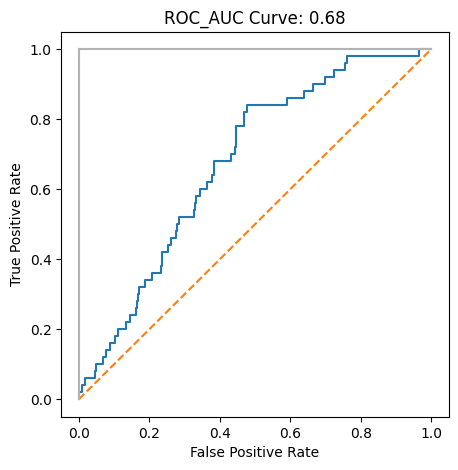

               precision    recall  f1-score   support

Good Customer       0.99      0.52      0.68      1498
 Bad Customer       0.05      0.82      0.10        50

     accuracy                           0.53      1548
    macro avg       0.52      0.67      0.39      1548
 weighted avg       0.96      0.53      0.66      1548

[[782 716]
 [  9  41]]
782 716 9 41


C:\Users\emanlangit.AEONCREDIT\AppData\Local\Temp\ipykernel_14696\2920523527.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_proba)


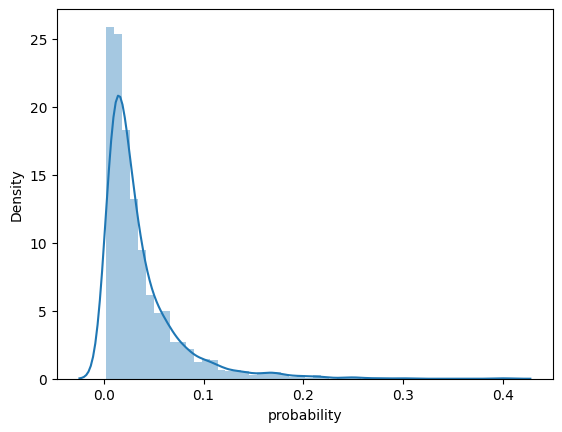

In [69]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba)

#compute optimal threshold based on roc_auc curve only
opt = true_positive_rate - false_positive_rate
tp_fp_diff = pd.DataFrame({'thresholds': threshold, 'tpr_fpr': opt})

max_index = tp_fp_diff.tpr_fpr.argmax()
THRESHOLD = tp_fp_diff.iloc[max_index][0]

y_pred = np.where(y_pred_proba > THRESHOLD, 1, 0)

plt.subplots(1, figsize = (5,5))
luh = roc_auc_score(y_test, y_pred_proba)
plt.title(f'ROC_AUC Curve: {luh:.2f}')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls = "--")
plt.plot([0,0],[1,0], c= ".7"), plt.plot([1,1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(classification_report(y_test, y_pred, target_names = ['Good Customer','Bad Customer']))
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(cnf_matrix)
print(tn, fp, fn, tp)

sns.distplot(y_pred_proba)
plt.show()

NTC: 0.68
low_CIBIL: 0.64
mid_CIBIL: 0.68
high_CIBIL: 0.68